# Logistic Regression Tutorial

Logistic regression belongs to the a group of supervised machine algorithms. It is similar to linear regression in the sense that you have one variable dependent on one or more independent variables. It's different from linear regression in that your dependent variable is categorical, not continuous. Because the variable you are trying to predict is categorical, Logistic Regression is a classification algorithm. Logistic regression might seem restrictive in low-dimensional spaces but in high dimensions it becomes very powerful.  

## How Does Logistic Regression Work

Logistic regression creates a decision boundary based off a bunch of variables. It predicts the outcome of a single dependent variable based on the values of its corresponding independent variables. Think using a person's height and weight to predict whether they are a male or a female. 


### Logistic Regression Equation
Logistic regression is mathematically modeled using the following equation:

log(p/1-p) = A+B(x1)+C(x2)+D(xn)
- p/1-p is the odds ratio
- A is equivalent to b in y=mx+b
- B, C, D, etc are equivalent to m in y=mx+b
- x1-xn are independent variables

### What does the Equation Mean?

WHenever the odds ratio is positive the probability of success is over 50% and the model predicts success, when its negative the model is below 50% and predicts failure.

I'm going to load the penguins dataset and create a graph of the logisitic regression of the data with male/female being the dependent variable and body mass as the only independent variable.


<AxesSubplot:xlabel='body_mass_g', ylabel='sex'>

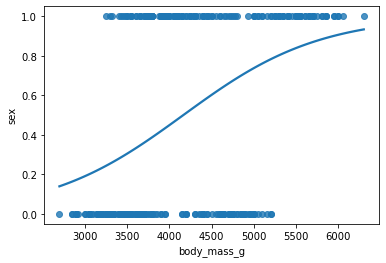

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 


df = sns.load_dataset('penguins')
df.dropna(axis=0, how='any', inplace=True)
df.head()

#lists of categoricals/numerics
categorical = ['species','island','sex']
numeric = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

#using pandas categorical method with .codes
df['species']=pd.Categorical(df['species']).codes

#using replace
df['island'].replace(['Torgersen','Biscoe','Dream'],[0,1,2], inplace=True)

#using get dummies
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

x = df['body_mass_g']
y = df['sex']

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

### What Does the equation Mean Continued

This obviously isn't a great model as I cut off a bunch of the other important vairable for the sake of simplicity. Anything below 50% sorts into one sex and anything above 50% sorts into the other and there's a logarythmic curve that shows a decision boundary.

## MultiClass Logistic Regression



## Advantages and Disadvantages of Logistic Regression

Logistic regression is a simplisitc algorithm that comes with distinct advantages and disadvantages.

### Logistic Regression Advantages
- Easy to understand and implement
- Accurate for simples data sets
- NO assumptions about distributions of data

### Logistic Regression Disadvantages

- Prone to overfitting
- Non-linear problems cannot be solved withouth significant feature engineering
- Complex relationships are hard to suss out
- Scaling is required (although easy to implement)

## Logistic Regression Parameters

Logistic Regression has two very important parameters and a few other less important ones. I'm only going to explain the important ones and reference the documentation for the others.

The important parameters of logistic regression are:
- penalty - specifies the penalty
- C (regularization strength) - specified the strengh of regularization, high c value means high regularization means the algorithm tries to fit the training data as well as possible (leading to potential overfitting).

## Logistic Regression Exploration and Analysis

The algorithm can be loaded from skLearn:

sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Full documentation available here (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

I'm going to use the penguins dataset to  explore the logistic regression algorithm from sklearn.

In [22]:
X = df.drop('sex', axis=1)
y=df['sex']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
a_score = str(round(accuracy_score(y_test, predictions),3))
print('Accuracy Score:  '+ a_score)

Accuracy Score:  0.762


In [23]:
X = df.drop('sex', axis=1)
y=df['sex']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
a_score = str(round(accuracy_score(y_test, predictions),3))
print('Accuracy Score:  '+ a_score)

Accuracy Score:  0.905


## Exploration and Analysis Continued

When I first ran this data set, the accuracy score was AWFUL clocking in at ~0.76. Upon closer examination, I forgot to preprocess and scale the data. After scaling the data I got a much better ~0.9

I'm still going to try to improve ith with some hyperparameter tuning, specifically C the regularization parameter. 

In [31]:
regularization = []
accuracy = []

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    method = LogisticRegression(C=c)
    method.fit(X_train,y_train)
    predictions = method.predict(X_test)   
    a_score = str(round(accuracy_score(y_test, predictions),3))
    
    regularization.append(c)
    accuracy.append(a_score)
    
df_c = pd.DataFrame(regularization)
df_c['Accuracy Score'] = accuracy
df_c = df_c.rename(columns = {0:'regularization'})
df_c.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_c.head(10)

,regularization,Accuracy Score
4,10.000,0.917
3,1.000,0.905
5,100.000,0.893
6,1000.000,0.893
2,0.100,0.798
1,0.010,0.571
0,0.001,0.429


<AxesSubplot:xlabel='regularization', ylabel='Accuracy Score'>

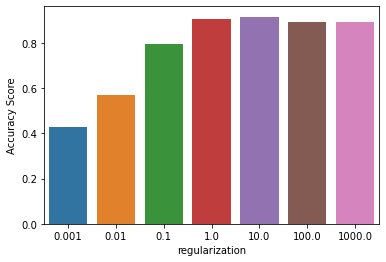

In [32]:
df_c['Accuracy Score'] = df_c['Accuracy Score'].astype(float)
sns.barplot(data=df_c, x="regularization", y="Accuracy Score")

## Conclusion

That's logistic regression. Its an easy to undertand and easy to implement algorith with little CPU requirements. There are 3 things you need to remember about it, they are:

- Scaling is required, standardization is not
- C is the primary hyperparameter to tweak for performance
- Data must be linear, if its not you needt to transform it linearly OR use another algorithm,
